In [1]:
import pandas as pd

df = pd.read_csv("customer_churn_dataset-testing-master.csv")


In [2]:
df.head()


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [3]:
df.shape


(64374, 12)

In [4]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [8]:
print(df['Total Spend'].isnull().sum())

0


In [10]:
df.columns = df.columns.str.strip()  


In [9]:
df['Churn'].value_counts()


Churn
0    33881
1    30493
Name: count, dtype: int64

In [11]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [20]:
df.columns = df.columns.str.strip()

In [22]:

def age_group(age):
    if age < 25:
        return 'Teen-Young'
    elif age <= 35:
        return 'Young-Adult'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Senior'

def tenure_group(months):
    if months <= 12:
        return '0-1 Year'
    elif months <= 24:
        return '1-2 Years'
    elif months <= 48:
        return '2-4 Years'
    else:
        return '4+ Years'

def usage_group(freq):
    if freq < 5:
        return 'Low'
    elif freq <= 15:
        return 'Medium'
    else:
        return 'High'

def support_risk(calls):
    if calls == 0:
        return 'No Risk'
    elif calls <= 3:
        return 'Low Risk'
    else:
        return 'High Risk'

df['AgeGroup'] = df['Age'].apply(age_group)
df['TenureGroup'] = df['Tenure'].apply(tenure_group)
df['UsageGroup'] = df['Usage Frequency'].apply(usage_group)
df['SupportRisk'] = df['Support Calls'].apply(support_risk)


In [23]:

print(df[['Age', 'AgeGroup', 'Tenure', 'TenureGroup', 'Usage Frequency', 'UsageGroup', 'Support Calls', 'SupportRisk']].head())

   Age     AgeGroup  Tenure TenureGroup  Usage Frequency UsageGroup  \
0   22   Teen-Young      25   2-4 Years               14     Medium   
1   41        Adult      28   2-4 Years               28       High   
2   47        Adult      27   2-4 Years               10     Medium   
3   35  Young-Adult       9    0-1 Year               12     Medium   
4   53       Senior      58    4+ Years               24       High   

   Support Calls SupportRisk  
0              4   High Risk  
1              7   High Risk  
2              2    Low Risk  
3              5   High Risk  
4              9   High Risk  


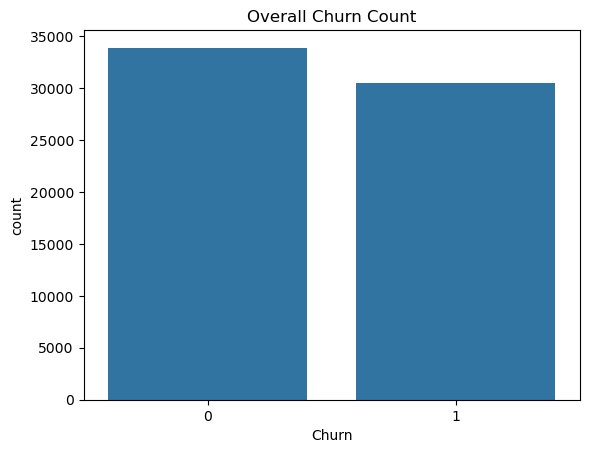

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Count')
plt.show()


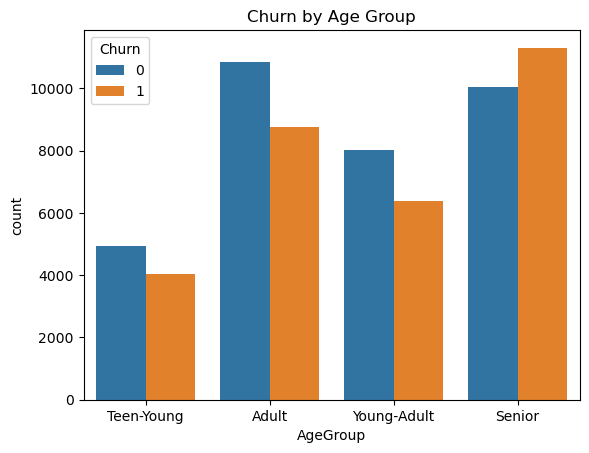

In [25]:
sns.countplot(x='AgeGroup', hue='Churn', data=df)
plt.title('Churn by Age Group')
plt.show()


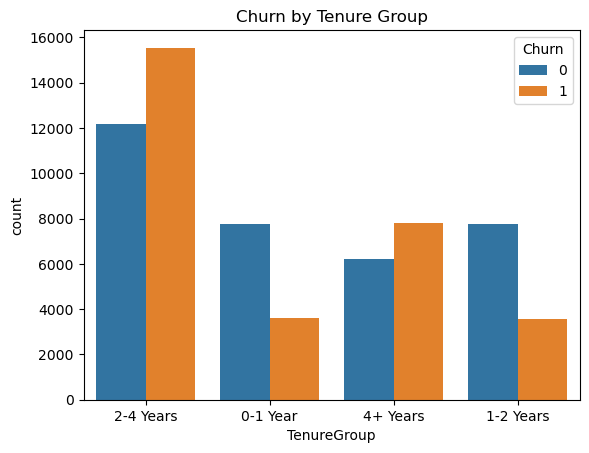

In [26]:
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.show()


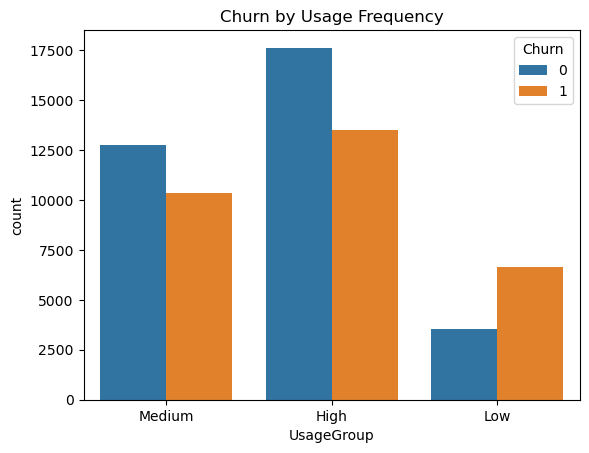

In [27]:
sns.countplot(x='UsageGroup', hue='Churn', data=df)
plt.title('Churn by Usage Frequency')
plt.show()


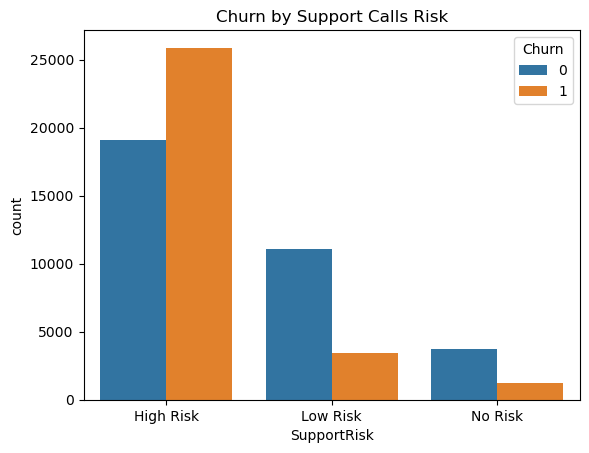

In [28]:
sns.countplot(x='SupportRisk', hue='Churn', data=df)
plt.title('Churn by Support Calls Risk')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [30]:
categorical_cols = ['Gender', 'Subscription Type', 'Contract Length', 
                    'AgeGroup', 'TenureGroup', 'UsageGroup', 'SupportRisk']

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [31]:
X = df.drop(['CustomerID', 'Churn'], axis=1)  
y = df['Churn']                               

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9986796116504855

Confusion Matrix:
 [[6786    7]
 [  10 6072]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



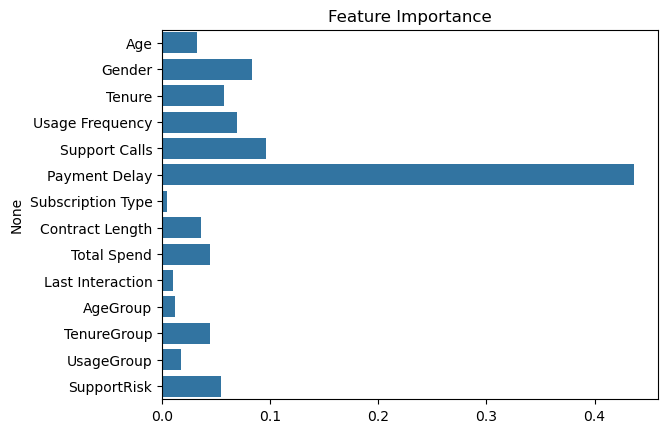

In [35]:
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importance')
plt.show()


In [36]:

df.to_excel('CustomerChurn_Final.xlsx', index=False)
print("Dataset exported to CustomerChurn_Final.xlsx")


Dataset exported to CustomerChurn_Final.xlsx


In [1]:
import os
print(os.getcwd())
print(os.path.exists('CustomerChurn_Final.xlsx'))


C:\Users\lenovo
True
